In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pims
import pandas as pd

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 19
from matplotlib.animation import FuncAnimation
# import matplotlib.pyplot as plt
# from numba import njit
from scipy.optimize import curve_fit

import os
import subprocess

In [2]:
def read_dat_file(filename):
    params = {}
    
    # Read the .dat file
    with open(filename, 'r') as file:
        for line in file:
            key, value = line.split()
            params[key] = value
    
    # Format the output string
    output_string = (
        f"particle_positions_Dt_{params['Dt']}_Nparticles_{params['Nparticles']}_R_{params['R']}_T_{params['T']}_Vo_{params['Vo']}_aligstr_{params['aligstr']}_box_{params['box']}_cutoff_{params['cutoff']}_epsilon_{params['epsilon']}_eta_{params['eta']}_sigma_{params['sigma']}"
    )
    
    return output_string,params


In [3]:
def read_dat_file_OP(filename):
    params = {}
    
    # Read the .dat file
    with open(filename, 'r') as file:
        for line in file:
            key, value = line.split()
            params[key] = value
    
    # Format the output string
    output_string = (
        f"squared_disp_Dt_{params['Dt']}_Nparticles_{params['Nparticles']}_R_{params['R']}_T_{params['T']}_Vo_{params['Vo']}_aligstr_{params['aligstr']}_box_{params['box']}_cutoff_{params['cutoff']}_epsilon_{params['epsilon']}_eta_{params['eta']}_sigma_{params['sigma']}"
    )
    
    return output_string

In [4]:

def read_positions(filename,N):
    data= np.loadtxt(filename)
    X = data[:,0]
    Y = data[:,1]
    Theta = data[:,2]
    Steps = len(X) //N 
    X = np.reshape(X,(Steps,N))
    Y = np.reshape(Y,(Steps,N))
    Theta = np.reshape(Theta,(Steps,N))
    return X,Y,Theta


In [86]:


file_name,params = read_dat_file('params.dat')
OP_str = read_dat_file_OP('params.dat')
os.makedirs(file_name,exist_ok=True)
# file_name = file_name+'.dat'
# OP_str=OP_str+'.dat'
N=int(params['Nparticles'])
T = int(params['T'])

command = f"mv *{file_name[19:]}.dat {file_name}"
subprocess.run(command,shell=True)

mv: cannot stat '*Dt_0.1_Nparticles_10000_R_1_T_10000_Vo_1_aligstr_1_box_100_cutoff_0.5_epsilon_0.1_eta_0.5_sigma_0.5.dat': No such file or directory


CompletedProcess(args='mv *Dt_0.1_Nparticles_10000_R_1_T_10000_Vo_1_aligstr_1_box_100_cutoff_0.5_epsilon_0.1_eta_0.5_sigma_0.5.dat particle_positions_Dt_0.1_Nparticles_10000_R_1_T_10000_Vo_1_aligstr_1_box_100_cutoff_0.5_epsilon_0.1_eta_0.5_sigma_0.5', returncode=1)

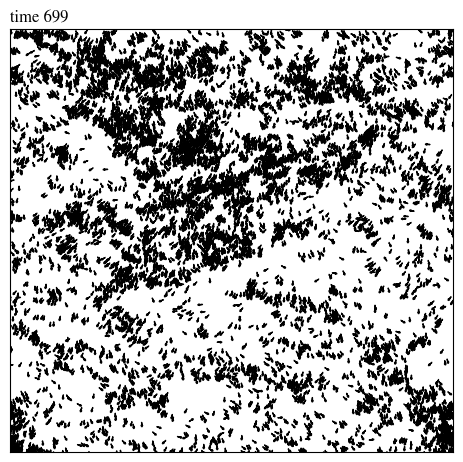

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

CompletedProcess(args="ffmpeg -r 15 -start_number 500 -i 'particle_positions_Dt_0.1_Nparticles_10000_R_1_T_10000_Vo_1_aligstr_1_box_100_cutoff_0.5_epsilon_0.1_eta_0.5_sigma_0.5/positions_%03d.png' -pix_fmt yuv420p particle_positions_Dt_0.1_Nparticles_10000_R_1_T_10000_Vo_1_aligstr_1_box_100_cutoff_0.5_epsilon_0.1_eta_0.5_sigma_0.5/movie_only_arrows.mp4", returncode=0)

In [93]:

# file_name = f'particle_positions_Dt_0.1_Nparticles_100_T_100_Vo_1_aligstr_0.5_box_80_cutoff_0.5_epsilon_0.5_eta_0.8_sigma_1'


X,Y,Theta = read_positions(f'{file_name}/'+file_name+'.dat',N)
fig, ax1 = plt.subplots(figsize=(5,5))  
BOX_SIZE = float(params['box'])
max_x = X.max()
max_y = Y.max()
scale = 0.7
sigma =float(params['sigma'])*0.05
# x,y = [], []
for time in range(500,700):
    ax1.clear()
    Xnow = X[time]
    Ynow = Y[time]
    Thetanow=Theta[time]
    # print(Thetanow)
    # Xnext = X[time+1]
    # Ynext = Y[time+1]
    # Xp_now = Xp[time]
    # Yp_now = Yp[time]
    for posx, posy,angle in zip(Xnow, Ynow,Thetanow):
        # lx= abs(-dx + posx)
        # ly = abs(-dy + posy)
        dx = np.cos(angle)*scale
        dy = np.sin(angle)*scale
        
        ax1.arrow(posx, posy, dx, dy, head_width=0.4, head_length=0.4,color='black')
        # ax1.add_patch(plt.Circle((posx, posy), radius=sigma, fill=True,color='red'))
        
        # if lx >= BOX_SIZE/2 or ly >= BOX_SIZE/2:
        #     ax1.plot(posx,posy,lw=0,marker='o',ms=0.01)
        # else:
        #     ax1.plot(np.array([posx,dx]),np.array([posy,dy]))
        
        
        ax1.set_title(f'time {time}',fontsize=12,loc='left')
        
    ax1.set_xlim(0,BOX_SIZE)
    ax1.set_ylim(0,BOX_SIZE)
    # ax1.set_xticks([0,BOX_SIZE//2, BOX_SIZE])
    # ax1.set_yticks([0,BOX_SIZE//2, BOX_SIZE])
    ax1.set_xticks([])
    ax1.set_yticks([])
    # ax1.set_xlabel(r'$x$')
    # ax1.set_ylabel(r'$y$')
    # ax1.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig(f"{file_name}/positions_{time:03d}.png",dpi=200)
plt.show()



command = f"ffmpeg -r 15 -start_number 500 -i '{file_name}/positions_%03d.png' -pix_fmt yuv420p {file_name}/movie_only_arrows.mp4"
subprocess.run(command, shell=True)


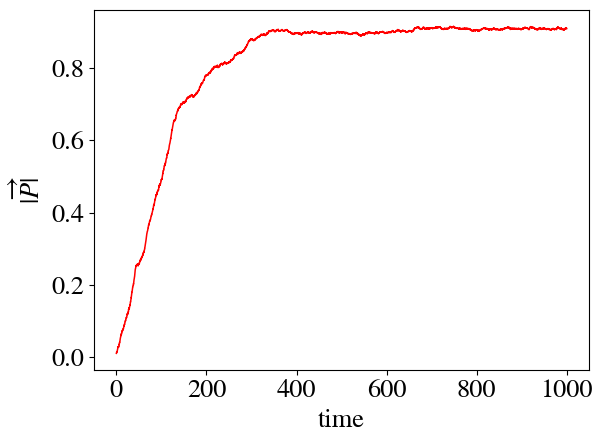

In [94]:

# OP_str = read_dat_file_OP('params.dat')
datamsd=np.loadtxt(f'{file_name}/'+OP_str+'.dat')
time = datamsd[:,0]
sq_p = datamsd[:,1]
fig,ax = plt.subplots()

ax.plot(time,sq_p, lw=1.1, color='red')
ax.set_xlabel('time')
ax.set_ylabel(r'$|\overrightarrow{P}|$')
# ax.legend()
# ax.loglog()
# ax.set_ylim((0,2.5))
plt.tight_layout()
plt.savefig(f'{file_name}/OP_vs_time.png',dpi=200,bbox_inches="tight")
plt.savefig(f'{file_name}/OP_vs_time.pdf',dpi=200,bbox_inches="tight")
plt.show()

Ising benchmark


In [3]:
etas = np.arange(0.05,1.5,0.1)
avgs_op = []
for eta in etas:
    op = np.loadtxt(f'vicsek_eta_values/squared_disp_Dt_0.1_Nparticles_6400_R_1_T_10000_Vo_1_aligstr_1_box_80_cutoff_0.5_epsilon_0.1_eta_{eta:.2f}_sigma_0.5.dat',usecols=1)
    avg = np.average(op[4000:])
    avgs_op.append(avg)
np.savetxt('vicsek_eta_values/op_vs_eta_v2.dat', np.c_[etas,avgs_op],fmt='%.4f')    

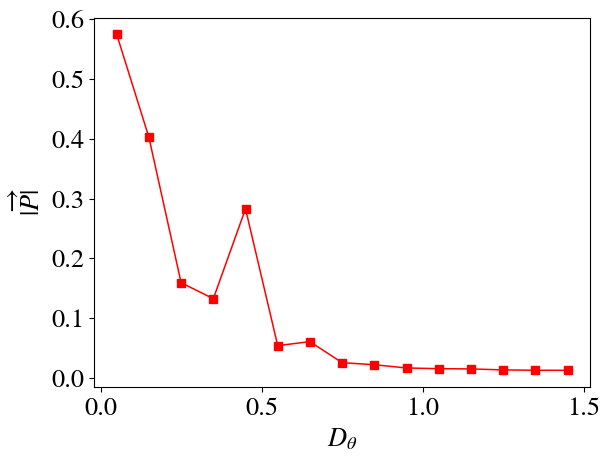

In [5]:
fig,ax = plt.subplots()

ax.plot(etas,avgs_op, lw=1.1, color='red',marker='s',ms=6)
ax.set_xlabel(r'$D_\theta$')
ax.set_ylabel(r'$|\overrightarrow{P}|$')
plt.savefig(f'vicsek_eta_values/op_vs_et_v2.pdf',dpi=200,bbox_inches="tight")
plt.show()